In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 연봉데이터 로딩, 전처리, eda, feature engineering modeling, 성능검증, 하이퍼파라미터 튜닝
### 기본모델: DecisionTree - 성능 기준
### 배깅, 부스팅, 랜덤배깅 모델 튜닝

### 분석목적 : 학력, 교육, 연수, 혼인상태, 직업정보가 있는 연봉데이터셋을 이용해 연봉 예측하기
### 연봉이 5만달러 이상인지 아닌지

* age: 나이
* workclass: 직업군
* education: 교육 수준
* education-num: 교육 연수
* marital-status: 결혼 상태
* occupation: 직업
* relationship: 가족 관계
* race: 인종
* sex: 성별
* capital-gain: 자본 소득
* capital-loss: 자본 손실
* hours-per-week: 주당 근로 시간
* native-country: 출신 국가
* class: 소득 등급

In [179]:
data = pd.read_csv("https://raw.githubusercontent.com/haram4th/ADsP/main/salary2.csv")
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [43]:
data2=pd.read_csv("https://raw.githubusercontent.com/haram4th/ADsP/main/salary2.csv")
data2

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   education       48842 non-null  object
 3   education-num   48842 non-null  int64 
 4   marital-status  48842 non-null  object
 5   occupation      46033 non-null  object
 6   relationship    48842 non-null  object
 7   race            48842 non-null  object
 8   sex             48842 non-null  object
 9   capital-gain    48842 non-null  int64 
 10  capital-loss    48842 non-null  int64 
 11  hours-per-week  48842 non-null  int64 
 12  native-country  47985 non-null  object
 13  class           48842 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


In [3]:
data.describe(include='all')

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
count,48842.000000,46043,48842,48842.000000,48842,46033,48842,48842,48842,48842.000000,48842.000000,48842.000000,47985,48842
unique,NaN,8,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33906,15784,NaN,22379,6172,19716,41762,32650,NaN,NaN,NaN,43832,37155
mean,38.643585,NaN,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN,NaN
std,13.710510,NaN,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN,NaN
min,17.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


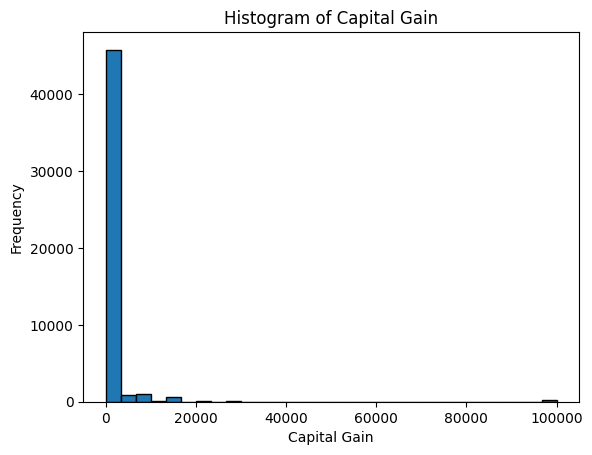

In [12]:
plt.hist(data['capital-gain'], bins=30, edgecolor='black')  # bins는 히스토그램의 구간 수를 의미합니다.
plt.title('Histogram of Capital Gain')
plt.xlabel('Capital Gain')
plt.ylabel('Frequency')
plt.show()

In [13]:
data[data['capital-gain']>=80000]

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
83,44,Self-emp-inc,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,99999,0,50,NaN,>50K
346,39,Private,HS-grad,9,Divorced,Exec-managerial,Unmarried,Black,Female,99999,0,40,United-States,>50K
357,50,Self-emp-not-inc,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,80,United-States,>50K
418,54,Self-emp-inc,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,40,United-States,>50K
692,41,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,55,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48109,47,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,55,United-States,>50K
48253,43,Self-emp-inc,Prof-school,15,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,40,United-States,>50K
48371,66,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,55,NaN,>50K
48519,47,Private,Prof-school,15,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,40,United-States,>50K


In [14]:
data['hours-per-week'].describe()

count    48842.000000
mean        40.422382
std         12.391444
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64

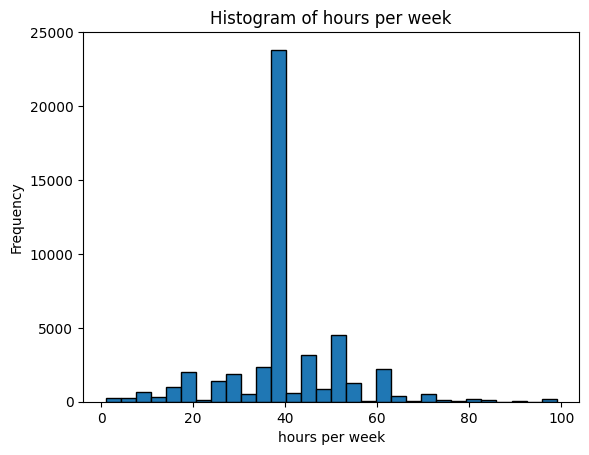

In [15]:
plt.hist(data['hours-per-week'], bins=30, edgecolor='black')  # bins는 히스토그램의 구간 수를 의미합니다.
plt.title('Histogram of hours per week')
plt.xlabel('hours per week')
plt.ylabel('Frequency')
plt.show()

In [4]:
data['class'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [180]:
data['class'] = data['class'].replace({' <=50K': 0, ' >50K': 1})
data.head()

C:\Users\5-11\AppData\Local\Temp\ipykernel_2544\1968050000.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['class'] = data['class'].replace({' <=50K': 0, ' >50K': 1})


,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,0


In [6]:
data['workclass'].unique()

array([' Private', ' Local-gov', nan, ' Self-emp-not-inc', ' Federal-gov',
       ' State-gov', ' Self-emp-inc', ' Without-pay', ' Never-worked'],
      dtype=object)

In [13]:
data[data['workclass'].isna()]['class'].value_counts()


class
0    2534
1     265
Name: count, dtype: int64

In [16]:
data['native-country'].unique()

array([' United-States', nan, ' Peru', ' Guatemala', ' Mexico',
       ' Dominican-Republic', ' Ireland', ' Germany', ' Philippines',
       ' Thailand', ' Haiti', ' El-Salvador', ' Puerto-Rico', ' Vietnam',
       ' South', ' Columbia', ' Japan', ' India', ' Cambodia', ' Poland',
       ' Laos', ' England', ' Cuba', ' Taiwan', ' Italy', ' Canada',
       ' Portugal', ' China', ' Nicaragua', ' Honduras', ' Iran',
       ' Scotland', ' Jamaica', ' Ecuador', ' Yugoslavia', ' Hungary',
       ' Hong', ' Greece', ' Trinadad&Tobago',
       ' Outlying-US(Guam-USVI-etc)', ' France', ' Holand-Netherlands'],
      dtype=object)

* workclass, occupation, native-country 열에 nan값이 있는 행들은 약 7%정도이므로 삭제하였음.

In [181]:
data = data.dropna(subset=['workclass'])
data = data.dropna(subset=['occupation'])
data = data.dropna(subset=['native-country'])

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45222 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45222 non-null  int64 
 1   workclass       45222 non-null  object
 2   education       45222 non-null  object
 3   education-num   45222 non-null  int64 
 4   marital-status  45222 non-null  object
 5   occupation      45222 non-null  object
 6   relationship    45222 non-null  object
 7   race            45222 non-null  object
 8   sex             45222 non-null  object
 9   capital-gain    45222 non-null  int64 
 10  capital-loss    45222 non-null  int64 
 11  hours-per-week  45222 non-null  int64 
 12  native-country  45222 non-null  object
 13  class           45222 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 5.2+ MB


In [182]:
data =pd.get_dummies(data, columns=['workclass'], drop_first=True)


In [23]:
data['education'].unique()

array([' 11th', ' HS-grad', ' Assoc-acdm', ' Some-college', ' 10th',
       ' Prof-school', ' 7th-8th', ' Bachelors', ' Masters', ' 5th-6th',
       ' Assoc-voc', ' 9th', ' Doctorate', ' 12th', ' 1st-4th',
       ' Preschool'], dtype=object)

In [26]:
data.head()

,age,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay
0,25,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0,False,True,False,False,False,False
1,38,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0,False,True,False,False,False,False
2,28,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1,True,False,False,False,False,False
3,44,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1,False,True,False,False,False,False
5,34,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0,False,True,False,False,False,False


* 교육수준에는 순서가 있는것으로 판단하여 라벨인코딩을 수행함.

In [183]:
education_order = [
    ' Preschool', ' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th', ' 10th', ' 11th', ' 12th',
    ' HS-grad', ' Some-college', ' Assoc-voc', ' Assoc-acdm', ' Bachelors', ' Masters', 
    ' Prof-school', ' Doctorate'
]

# Categorical data with a specific order
data['education'] = pd.Categorical(data['education'], categories=education_order, ordered=True)

# Label Encoding
data['education'] = data['education'].cat.codes

In [29]:
data.head()

,age,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay
0,25,6,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0,False,True,False,False,False,False
1,38,8,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0,False,True,False,False,False,False
2,28,11,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1,True,False,False,False,False,False
3,44,9,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1,False,True,False,False,False,False
5,34,5,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0,False,True,False,False,False,False


In [30]:
data['occupation'].unique()

array([' Machine-op-inspct', ' Farming-fishing', ' Protective-serv',
       ' Other-service', ' Prof-specialty', ' Craft-repair',
       ' Adm-clerical', ' Exec-managerial', ' Tech-support', ' Sales',
       ' Priv-house-serv', ' Transport-moving', ' Handlers-cleaners',
       ' Armed-Forces'], dtype=object)

In [34]:
data['capital-gain'].describe()

count    45222.000000
mean      1101.430344
std       7506.430084
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-gain, dtype: float64

In [35]:
data['capital-gain'].unique()

array([    0,  7688,  3103,  6418,  7298,  3908, 14084,  5178, 15024,
        2597,  2907,  4650,  6497,  5013, 27828,  4934,  4064,  3674,
        2174, 10605, 99999,  1055,   114,  2580,  3411,  4508,  4386,
        8614, 13550,  6849,  2463,  3137,  2885,  2964,  1471, 10566,
        2354,  1424,  1455,  3325,  4416, 25236,  4787,  2829,  4865,
        1264,  1506,   594, 10520,  3464, 20051,  4101,  1797,  2407,
        3471,  2653,  1086,  1848, 14344,  1151,  2993,  2290, 15020,
        9386,  2202,  3818,  2176,  5455,  3418, 11678,  7978,  7262,
        6514, 41310,  3456,  7430,  2062, 34095,  1831,  6723,  5060,
       15831,  2977,  2346,  3273,  2329,  9562,  2105,  2635,  2414,
        4931,  1731,  6097,   914,  7896,  5556,  3781,  3942,  2538,
        3887,  1409, 25124,  7443,  5721,   401,  1173,  4687,  6767,
         991,  2036,  2050,  2961,  2228, 22040,  2936,  6360,  2009,
        3432,  1639, 18481,  2387], dtype=int64)

In [45]:
data['sex'].unique()

array([' Male', ' Female'], dtype=object)

In [44]:
data['sex'] = data2['sex']

In [184]:
data['sex'] = data['sex'].map({' Female': 0, ' Male': 1})


In [143]:
data

,age,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay
0,25,6,7,Never-married,Machine-op-inspct,Own-child,Black,1,0,0,40,United-States,0,False,True,False,False,False,False
1,38,8,9,Married-civ-spouse,Farming-fishing,Husband,White,1,0,0,50,United-States,0,False,True,False,False,False,False
2,28,11,12,Married-civ-spouse,Protective-serv,Husband,White,1,0,0,40,United-States,1,True,False,False,False,False,False
3,44,9,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,1,7688,0,40,United-States,1,False,True,False,False,False,False
5,34,5,6,Never-married,Other-service,Not-in-family,White,1,0,0,30,United-States,0,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,11,12,Married-civ-spouse,Tech-support,Wife,White,0,0,0,38,United-States,0,False,True,False,False,False,False
48838,40,8,9,Married-civ-spouse,Machine-op-inspct,Husband,White,1,0,0,40,United-States,1,False,True,False,False,False,False
48839,58,8,9,Widowed,Adm-clerical,Unmarried,White,0,0,0,40,United-States,0,False,True,False,False,False,False
48840,22,8,9,Never-married,Adm-clerical,Own-child,White,1,0,0,20,United-States,0,False,True,False,False,False,False


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45222 entries, 0 to 48841
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   age                          45222 non-null  int64 
 1   education                    45222 non-null  int8  
 2   education-num                45222 non-null  int64 
 3   marital-status               45222 non-null  object
 4   occupation                   45222 non-null  object
 5   relationship                 45222 non-null  object
 6   race                         45222 non-null  object
 7   sex                          45222 non-null  int64 
 8   capital-gain                 45222 non-null  int64 
 9   capital-loss                 45222 non-null  int64 
 10  hours-per-week               45222 non-null  int64 
 11  native-country               45222 non-null  object
 12  class                        45222 non-null  int64 
 13  workclass_ Local-gov         45222 n

In [65]:
crosstab = pd.crosstab(data['native-country'], data['class'])
print(crosstab)

class                           0      1
native-country                          
Cambodia                       17      9
Canada                        103     60
China                          77     36
Columbia                       78      4
Cuba                           99     34
Dominican-Republic             92      5
Ecuador                        37      6
El-Salvador                   136     11
England                        72     47
France                         20     16
Germany                       135     58
Greece                         31     18
Guatemala                      83      3
Haiti                          60      9
Holand-Netherlands              1      0
Honduras                       17      2
Hong                           20      8
Hungary                        12      6
India                          85     62
Iran                           34     22
Ireland                        26     10
Italy                          67     33
Jamaica         

In [66]:
from scipy.stats import chi2_contingency

# 카이제곱 검정 수행
chi2, p, dof, expected = chi2_contingency(crosstab)

print(f"Chi2 값: {chi2}")
print(f"p-값: {p}")

Chi2 값: 456.00898319151105
p-값: 5.399310993039213e-72


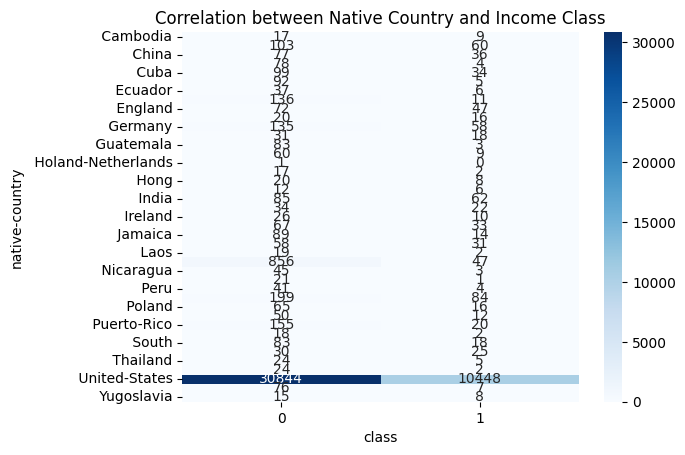

In [67]:
sns.heatmap(crosstab, annot=True, cmap='Blues', fmt='d')
plt.title('Correlation between Native Country and Income Class')
plt.show()

In [68]:
# 교차표 생성
crosstab_race_class = pd.crosstab(data['race'], data['class'])

# 카이제곱 검정 수행
from scipy.stats import chi2_contingency

chi2_race, p_race, dof_race, expected_race = chi2_contingency(crosstab_race_class)

print(f"Chi2 값: {chi2_race}")
print(f"p-값: {p_race}")


Chi2 값: 452.30421393271354
p-값: 1.3794458063305066e-96


In [70]:
# 교차표 생성
crosstab_marital_class = pd.crosstab(data['marital-status'], data['class'])

# 카이제곱 검정 수행
from scipy.stats import chi2_contingency

chi2_marital, p_marital, dof_marital, expected_marital = chi2_contingency(crosstab_marital_class)

print(f"Chi2 값: {chi2_marital}")
print(f"p-값: {p_marital}")


Chi2 값: 9109.229883385724
p-값: 0.0


In [71]:
crosstab_occupation_class = pd.crosstab(data['occupation'], data['class'])

# 카이제곱 검정 수행
chi2_occupation, p_occupation, dof_occupation, expected_occupation = chi2_contingency(crosstab_occupation_class)

print(f"Chi2 값: {chi2_occupation}")
print(f"p-값: {p_occupation}")

Chi2 값: 5415.137774515375
p-값: 0.0


In [72]:
crosstab_relationship_class = pd.crosstab(data['relationship'], data['class'])

# 카이제곱 검정 수행
chi2_relationship, p_relationship, dof_relationship, expected_relationship = chi2_contingency(crosstab_relationship_class)

print(f"Chi2 값: {chi2_relationship}")
print(f"p-값: {p_relationship}")

Chi2 값: 9357.036670809357
p-값: 0.0


In [185]:
data = pd.get_dummies(data, columns=['native-country'], drop_first=True)
data = pd.get_dummies(data, columns=['race'], drop_first=True)
data = pd.get_dummies(data, columns=['marital-status'], drop_first=True)
data = pd.get_dummies(data, columns=['occupation'], drop_first=True)
data = pd.get_dummies(data, columns=['relationship'], drop_first=True)

In [160]:
data

,age,education,education-num,sex,capital-gain,capital-loss,hours-per-week,class,workclass_ Local-gov,workclass_ Private,...,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife
0,25,6,7,1,0,0,40,0,False,True,...,False,False,False,False,False,False,False,True,False,False
1,38,8,9,1,0,0,50,0,False,True,...,False,False,False,False,False,False,False,False,False,False
2,28,11,12,1,0,0,40,1,True,False,...,False,True,False,False,False,False,False,False,False,False
3,44,9,10,1,7688,0,40,1,False,True,...,False,False,False,False,False,False,False,False,False,False
5,34,5,6,1,0,0,30,0,False,True,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,11,12,0,0,0,38,0,False,True,...,False,False,False,True,False,False,False,False,False,True
48838,40,8,9,1,0,0,40,1,False,True,...,False,False,False,False,False,False,False,False,False,False
48839,58,8,9,0,0,0,40,0,False,True,...,False,False,False,False,False,False,False,False,True,False
48840,22,8,9,1,0,0,20,0,False,True,...,False,False,False,False,False,False,False,True,False,False


In [51]:
data_corr=data.corr(method='spearman')

In [39]:
data['race'].unique()

array([' Black', ' White', ' Other', ' Amer-Indian-Eskimo',
       ' Asian-Pac-Islander'], dtype=object)

In [40]:
data['relationship'].unique()

array([' Own-child', ' Husband', ' Not-in-family', ' Unmarried', ' Wife',
       ' Other-relative'], dtype=object)

In [24]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [186]:
X=data.drop('class', axis=1)

In [187]:
y=data['class']

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=8)

In [189]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train, y_train)
pred=dtc.predict(X_test)
print(accuracy_score(y_test, pred))
print(classification_report(y_test,pred))

0.8124124714380482
              precision    recall  f1-score   support

           0       0.87      0.88      0.88     10239
           1       0.62      0.59      0.61      3328

    accuracy                           0.81     13567
   macro avg       0.75      0.74      0.74     13567
weighted avg       0.81      0.81      0.81     13567



In [58]:
data2.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'class'],
      dtype='object')

In [60]:
data[['age','class']].corr()

,age,class
age,1.00000,0.23704
class,0.23704,1.00000


In [62]:
data[['education','class']].corr()

,education,class
education,1.0000,0.3328
class,0.3328,1.0000


In [63]:
data[['education-num','class']].corr()

,education-num,class
education-num,1.0000,0.3328
class,0.3328,1.0000


In [67]:
data[['capital-gain','class']].corr()

,capital-gain,class
capital-gain,1.000000,0.221034
class,0.221034,1.000000


In [94]:
data[['hours-per-week','class']].corr()

,hours-per-week,class
hours-per-week,1.000000,0.227199
class,0.227199,1.000000


In [190]:
data3=data.copy()

In [80]:
data3

,age,education,education-num,sex,capital-gain,capital-loss,hours-per-week,class,workclass_ Local-gov,workclass_ Private,...,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife
0,25,6,7,1,0,0,40,0,False,True,...,False,False,False,False,False,False,False,True,False,False
1,38,8,9,1,0,0,50,0,False,True,...,False,False,False,False,False,False,False,False,False,False
2,28,11,12,1,0,0,40,1,True,False,...,False,True,False,False,False,False,False,False,False,False
3,44,9,10,1,7688,0,40,1,False,True,...,False,False,False,False,False,False,False,False,False,False
5,34,5,6,1,0,0,30,0,False,True,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,11,12,0,0,0,38,0,False,True,...,False,False,False,True,False,False,False,False,False,True
48838,40,8,9,1,0,0,40,1,False,True,...,False,False,False,False,False,False,False,False,False,False
48839,58,8,9,0,0,0,40,0,False,True,...,False,False,False,False,False,False,False,False,True,False
48840,22,8,9,1,0,0,20,0,False,True,...,False,False,False,False,False,False,False,True,False,False


In [105]:
data['age'].describe()

count    45222.000000
mean        38.547941
std         13.217870
min         17.000000
25%         28.000000
50%         37.000000
75%         47.000000
max         90.000000
Name: age, dtype: float64

In [92]:
data3

,age,education,education-num,sex,capital-gain,capital-loss,hours-per-week,class,workclass_ Local-gov,workclass_ Private,...,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,age_group
0,25,6,7,1,0,0,40,0,False,True,...,False,False,False,False,False,False,True,False,False,1
1,38,8,9,1,0,0,50,0,False,True,...,False,False,False,False,False,False,False,False,False,2
2,28,11,12,1,0,0,40,1,True,False,...,True,False,False,False,False,False,False,False,False,1
3,44,9,10,1,7688,0,40,1,False,True,...,False,False,False,False,False,False,False,False,False,3
5,34,5,6,1,0,0,30,0,False,True,...,False,False,False,False,True,False,False,False,False,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,11,12,0,0,0,38,0,False,True,...,False,False,True,False,False,False,False,False,True,1
48838,40,8,9,1,0,0,40,1,False,True,...,False,False,False,False,False,False,False,False,False,3
48839,58,8,9,0,0,0,40,0,False,True,...,False,False,False,False,False,False,False,True,False,4
48840,22,8,9,1,0,0,20,0,False,True,...,False,False,False,False,False,False,True,False,False,1


In [191]:
data3 = data3.drop(columns=['capital-loss'],axis=1)
data3 = data3.drop(columns=['age'],axis=1) 
data3 = data3.drop(columns=['sex'],axis=1)

In [192]:
X3=data3.drop('class', axis=1)

In [193]:
y3=data3['class']

In [194]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3,y3, test_size=0.2, random_state=8)

In [195]:
dtc3=DecisionTreeClassifier()
dtc3.fit(X_train3, y_train3)
pred3=dtc3.predict(X_test3)
print(accuracy_score(y_test3, pred3))
print(classification_report(y_test3,pred3))

0.8344941956882256
              precision    recall  f1-score   support

           0       0.88      0.91      0.89      6855
           1       0.67      0.61      0.64      2190

    accuracy                           0.83      9045
   macro avg       0.78      0.76      0.77      9045
weighted avg       0.83      0.83      0.83      9045



In [36]:
from sklearn.ensemble import BaggingClassifier

In [172]:
bc = BaggingClassifier(n_estimators=1000, n_jobs=7, random_state=7)
bc.fit(X_train3,y_train3)
pred=bc.predict(X_test3)
print(accuracy_score(y_test3,pred3))
print(classification_report(y_test3,pred3))

0.8184632393587618
              precision    recall  f1-score   support

           0       0.88      0.89      0.88      6855
           1       0.63      0.61      0.62      2190

    accuracy                           0.82      9045
   macro avg       0.75      0.75      0.75      9045
weighted avg       0.82      0.82      0.82      9045



In [38]:
from xgboost import XGBClassifier

In [39]:
xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=8, max_depth=101)
xgb.fit(X_train3,y_train3)
pred=xgb.predict(X_test3)
print(accuracy_score(y_test3,pred3))
print(classification_report(y_test3,pred3))

0.8292179553327929
              precision    recall  f1-score   support

           0       0.87      0.91      0.89     10239
           1       0.67      0.60      0.63      3328

    accuracy                           0.83     13567
   macro avg       0.77      0.75      0.76     13567
weighted avg       0.82      0.83      0.83     13567



In [196]:
data4=data3.copy()

In [127]:
from sklearn.preprocessing import StandardScaler

Correlation between education and education-num: 1.0


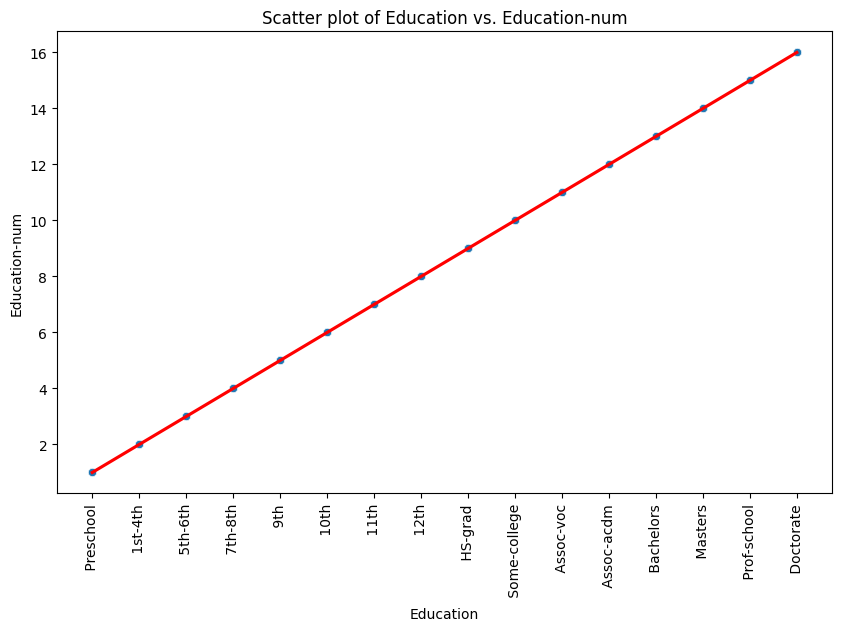

In [96]:
correlation = data4[['education', 'education-num']].corr().loc['education', 'education-num']
print(f"Correlation between education and education-num: {correlation}")

# 산점도와 회귀선 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data4, x='education', y='education-num')
sns.regplot(data=data4, x='education', y='education-num', ci=None, scatter=False, color='red')
plt.title('Scatter plot of Education vs. Education-num')
plt.xlabel('Education')
plt.ylabel('Education-num')
plt.xticks(ticks=range(len(education_order)), labels=education_order, rotation=90)
plt.show()

In [197]:
data4 = data4.drop(columns=['education-num'],axis=1)

In [130]:
scaler = StandardScaler()

In [131]:
data4['capital-gain'] = scaler.fit_transform(data4[['capital-gain']])


In [198]:
data4

,education,capital-gain,hours-per-week,class,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,...,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife
0,6,0,40,0,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,8,0,50,0,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,11,0,40,1,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,9,7688,40,1,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,5,0,30,0,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,11,0,38,0,False,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
48838,8,0,40,1,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
48839,8,0,40,0,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
48840,8,0,20,0,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [199]:
X4=data4.drop('class', axis=1)

In [200]:
y4=data4['class']

In [201]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4,y4, test_size=0.2, random_state=8)

In [202]:
dtc4=DecisionTreeClassifier()
dtc4.fit(X_train4, y_train4)
pred4=dtc4.predict(X_test4)
print(accuracy_score(y_test4, pred4))
print(classification_report(y_test4, pred4))

0.833167495854063
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      6855
           1       0.67      0.61      0.64      2190

    accuracy                           0.83      9045
   macro avg       0.77      0.76      0.77      9045
weighted avg       0.83      0.83      0.83      9045

